# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:

temp = pd.read_csv('..\\your-code\\Temp_States.csv')

#### Print `temp`

In [4]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
temp.dtypes

# strings and floats

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [6]:
temp[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:

nyc = temp[temp['State'] == 'New York']
nyc['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius


In [8]:
temp[temp['Temperature'] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
cities = temp[temp['Temperature'] > 15]
cities['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
city2 = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
city2['City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [12]:
temp.groupby('State')['Temperature'].agg(['mean', 'std'])

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
employee = pd.read_csv('..\\your-code\\employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
employee.dtypes


Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

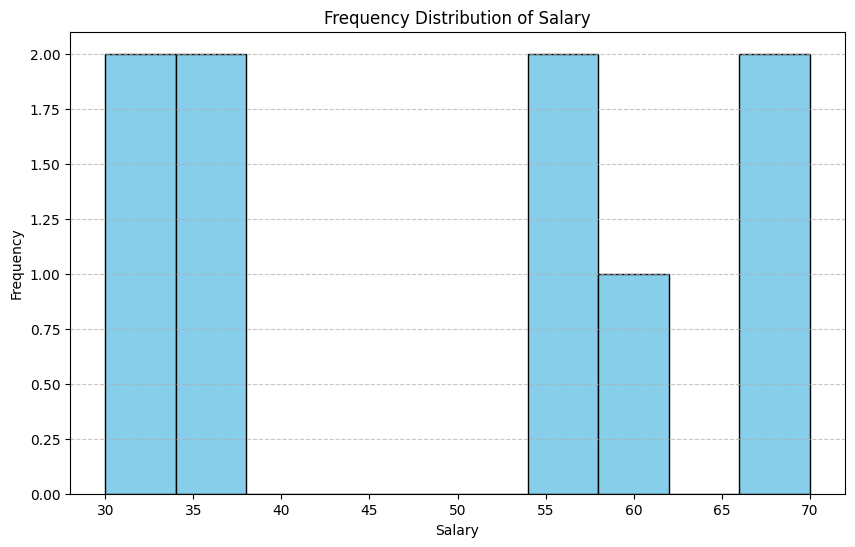

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(employee['Salary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### What's the average salary in this company?

In [19]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [20]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [21]:
employee['Salary'].min()


30

#### Who are the employees with the lowest salary?

In [22]:
employee.nsmallest(1, 'Salary')

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30


#### Could you give all the information about an employee called David?

In [23]:
employee[employee['Name'] == 'David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [24]:
employee.loc[employee['Name'] == 'David', 'Salary'].values[0]


30

#### Print all the rows where job title is associate

In [25]:
employee[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [26]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [27]:
employee[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [30]:
employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [31]:
employee.groupby('Years')['Salary'].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [32]:
employee.groupby('Title')['Salary'].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

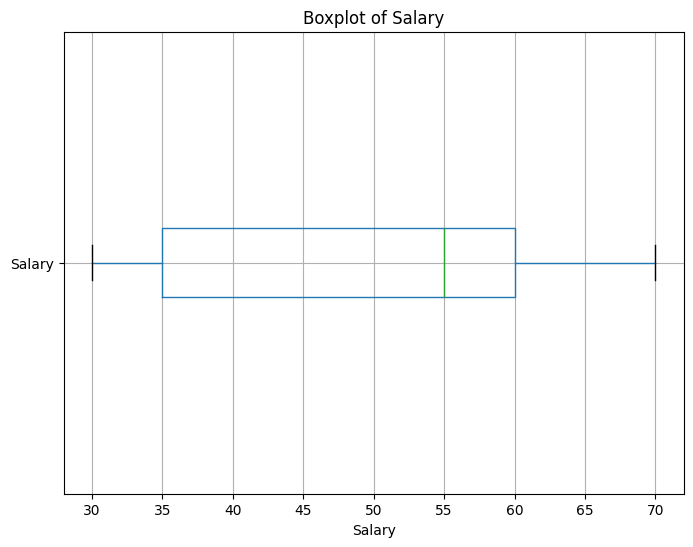

In [33]:
plt.figure(figsize=(8, 6))
employee.boxplot(column='Salary', vert=False)
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

In [35]:
# print first quartile here

employee['Salary'].quantile(0.25)

35.0

In [36]:
# print third quartile here

employee['Salary'].quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [37]:
employee.groupby('Gender')['Salary'].mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [39]:
employee.groupby('Department').agg({'Years': ['min', 'mean', 'max'],'Salary': ['min', 'mean', 'max']})

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [40]:
employee.groupby('Department')['Salary'].agg(lambda x: x.max() - x.min())

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [42]:
orders = pd.read_csv('..\\your-code\\Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [43]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [44]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [45]:
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


####  What is the average Purchase Price?

In [46]:
orders['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [47]:
orders['amount_spent'].max()

168469.6

In [48]:
orders['amount_spent'].min()

0.0

#### Select all the customers we have in Spain

In [51]:
orders[orders['Country'] == 'Spain']['CustomerID'].nunique()  

# en caso de filtrar solo por país, saldrían customerID repetidos:

30

In [53]:
orders[orders['Country'] == 'Spain']

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [52]:
orders[orders['Country'] == 'Spain']['CustomerID'].value_counts()

CustomerID
12540    478
12484    346
12539    273
17097    211
12597    206
12502    147
12556    121
12546     69
12462     62
12354     58
12550     57
12541     52
12545     50
12455     48
12421     45
12510     33
12557     33
12596     27
12417     23
12507     22
12448     22
12538     21
12544     19
12454     15
12442     12
12551     10
12450      8
12547      8
12548      5
12445      4
Name: count, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [54]:
orders[orders['Quantity']>50]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select orders from Spain that are above 50 items

In [57]:
orders[(orders['Quantity']>50) & (orders['Country']== 'Spain')].head()  #limito outputs porque salían muchos desplegados

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [59]:
orders[orders['amount_spent'] == 0].head() # de nuevo limito outputs

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [61]:
orders[orders['Description'].str.contains('lunch bag', case=False)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [63]:
orders[(orders['Description'].str.contains('lunch bag', case=False)) & (orders['year'] == 2011)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

In [67]:
orders[orders['Country'] == 'Spain'].groupby('amount_spent').size()

amount_spent
0.00       1
0.21       3
0.29       1
0.39       3
0.42       1
          ..
417.50     1
488.16     2
1080.00    1
1220.40    2
1350.00    3
Length: 316, dtype: int64

#### Select all orders made in the month of August

In [68]:
orders[orders['month'] == 8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [69]:
august_orders = orders[orders['month'] == 8]
august_orders['Country'].value_counts()

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### What's the  average amount of money spent by country

In [71]:
orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [74]:
orders.loc[orders['UnitPrice'].idxmax()]

Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object

#### What was the average amount spent per year ?

In [75]:
orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64